<a href="https://colab.research.google.com/github/jpiche0720/DS-Unit-4-Sprint-1-NLP/blob/main/module2-vector-representations/LS_DS_412_Vector_Representations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

In [ ]:
import spacy.cli
spacy.cli.download("en_core_web_lg")

In [2]:
!wget https://raw.githubusercontent.com/jpiche0720/DS-Unit-4-Sprint-1-NLP/main/module2-vector-representations/data/job_listings.csv

--2020-10-20 18:19:16--  https://raw.githubusercontent.com/jpiche0720/DS-Unit-4-Sprint-1-NLP/main/module2-vector-representations/data/job_listings.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1670819 (1.6M) [text/plain]
Saving to: ‘job_listings.csv.3’

job_listings.csv.3  100%[===================>]   1.59M  --.-KB/s    in 0.06s   

2020-10-20 18:19:16 (24.5 MB/s) - ‘job_listings.csv.3’ saved [1670819/1670819]



## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [3]:
from bs4 import BeautifulSoup
import requests

jobs = pd.read_csv('job_listings.csv')
jobs.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [4]:
def clean_up(X):
  soup = BeautifulSoup(X)
  raw = soup.get_text()
  raw = raw.replace("\\n", ' ')
  return raw[2:-1]

In [5]:
jobs['cleaned_description'] = jobs['description'].apply(clean_up)

jobs.head()

,Unnamed: 0,description,title,cleaned_description
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,Job Requirements: Conceptual understanding in ...
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"Job Description As a Data Scientist 1, you wi..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,As a Data Scientist you will be working on con...
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"$4,969 - $6,756 a monthContractUnder the gener..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,Location: USA \xe2\x80\x93 multiple locations ...


## 2) Use Spacy to tokenize the listings 

In [6]:
nlp = spacy.load("en_core_web_lg")

text = jobs['cleaned_description'][0]
doc = nlp(text)

print([token.lemma_ for token in doc if (token.is_stop != True) and (token.is_punct != True)])


['job', 'requirement', 'conceptual', 'understanding', 'Machine', 'Learning', 'model', 'like', 'nai\\xc2\\xa8ve', 'Bayes', 'K', 'Means', 'SVM', 'Apriori', 'Linear/', 'Logistic', 'Regression', 'neural', 'Random', 'Forests', 'decision', 'Trees', 'K', 'NN', 'hand', 'experience', '2', 'Intermediate', 'expert', 'level', 'coding', 'skill', 'Python', 'R.', 'ability', 'write', 'function', 'clean', 'efficient', 'datum', 'manipulation', 'mandatory', 'role', 'exposure', 'package', 'like', 'NumPy', 'SciPy', 'Pandas', 'Matplotlib', 'etc', 'Python', 'GGPlot2', 'dplyr', 'tidyR', 'r', 'ability', 'communicate', 'Model', 'finding', 'Technical', 'Non', 'technical', 'stake', 'holder', 'hand', 'experience', 'SQL', 'Hive', 'similar', 'programming', 'language', 'past', 'work', 'GitHub', 'Kaggle', 'publish', 'article', 'Master', 'degree', 'Statistics', 'Mathematics', 'Computer', 'Science', 'quant', 'specific', 'field', 'apply']


In [7]:
def tokenize(X):
  doc = nlp(X)
  return [token.lemma_ for token in doc if (token.is_stop != True) and (token.is_punct != True)]


In [8]:
jobs['tokens'] = jobs['cleaned_description'].apply(tokenize)

jobs.head()

,Unnamed: 0,description,title,cleaned_description,tokens
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,Job Requirements: Conceptual understanding in ...,"[job, requirement, conceptual, understanding, ..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"Job Description As a Data Scientist 1, you wi...","[job, description, , Data, scientist, 1, help..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,As a Data Scientist you will be working on con...,"[Data, scientist, work, consult, business, res..."
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"$4,969 - $6,756 a monthContractUnder the gener...","[$, 4,969, $, 6,756, monthcontractunder, gener..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,Location: USA \xe2\x80\x93 multiple locations ...,"[location, USA, \xe2\x80\x93, multiple, locati..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [9]:
data = jobs['cleaned_description']

vect = CountVectorizer(stop_words='english', max_features=500)

# #Learn our Vocab
vect.fit(data)

# Get sparse dtm
dtm = vect.transform(data)

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

In [10]:
def boolean(X):
  if X > 0 :
    return True
  else: 
    return False


  

In [11]:
dtm_bool = dtm.astype(bool)

In [12]:
dtm_bool

,ability,able,access,achieve,action,actionable,ad,additional,address,advanced,age,ai,algorithms,analyses,analysis,analytic,analytical,analytics,analyze,analyzing,applicants,application,applications,applied,apply,applying,approaches,appropriate,areas,artificial,assist,audience,audiences,available,aws,bachelor,background,based,basic,basis,...,unique,united,unstructured,use,used,user,users,using,value,values,variety,various,verbal,veteran,vision,visualization,want,way,ways,work,working,workplace,world,writing,written,www,x80,x83,x93,x98,x99,x99ll,x99re,x99s,x9d,xc2,xe2,xef,year,years
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,True,True,True,False,True,False,False,False,True,False,True,True,False,False,True,False,True,False
2,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,True,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,True,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,True,True,True,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,True,...,True,False,False,False,True,False,False,True,True,True,True,False,False,True,False,False,True,True,False,True,False,False,False,False,False,True,True,False,False,False,False,True,True,True,False,False,True,False,True,True
422,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,...,False,

In [13]:
dtm_bin = dtm_bool.replace({True: 1,False:0})
dtm_bin.head()

,ability,able,access,achieve,action,actionable,ad,additional,address,advanced,age,ai,algorithms,analyses,analysis,analytic,analytical,analytics,analyze,analyzing,applicants,application,applications,applied,apply,applying,approaches,appropriate,areas,artificial,assist,audience,audiences,available,aws,bachelor,background,based,basic,basis,...,unique,united,unstructured,use,used,user,users,using,value,values,variety,various,verbal,veteran,vision,visualization,want,way,ways,work,working,workplace,world,writing,written,www,x80,x83,x93,x98,x99,x99ll,x99re,x99s,x9d,xc2,xe2,xef,year,years
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0
2,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1


In [14]:
perc = pd.DataFrame(dtm_bin.sum()/426,columns= ['total_percent']).sort_values('total_percent',ascending = False)
top = perc.iloc[5:23]
top = top.reset_index()
top

,index,total_percent
0,python,0.793427
1,business,0.758216
2,xe2,0.739437
3,x80,0.737089
4,skills,0.732394
5,learning,0.727700
6,analysis,0.694836
7,scientist,0.692488
8,years,0.661972
9,machine,0.647887


In [15]:
totals = pd.DataFrame(dtm.sum(), columns = ['total']).sort_values('total',ascending = False)
totals = totals.reset_index()
totals

,index,total
0,data,4466
1,experience,1854
2,xe2,1417
3,x80,1404
4,business,1212
...,...,...
495,includes,55
496,motivated,55
497,manner,55
498,tech,55


## 4) Visualize the most common word counts

In [16]:
import seaborn

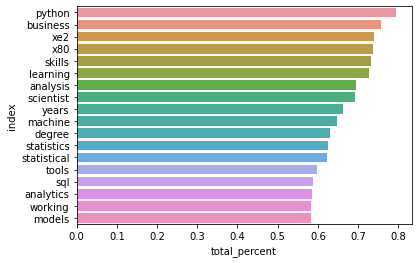

In [17]:

seaborn.barplot(x=top['total_percent'], y=top['index'], orient = 'h')

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [18]:

# Tunning Parameters

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', 
                        ngram_range=(1,2),
                        max_df=.97,
                        min_df=3,
                        tokenizer=tokenize)

# Create a vocabulary and get word counts per document
tf_dtm = tfidf.fit_transform(data) # Similiar to fit_predict

# Print word counts

# Get feature names to use as dataframe column headers
tf_dtm = pd.DataFrame(tf_dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
tf_dtm.head()

,,,,,2,3,4,5,ability,bachelor,build,collaborate,conduct,develop,driver,education,expect,experience,familiarity,join,kbr,kbrwyle,look,monpost,preferred,qualification,responsibility,slack,successful,work,1,2,3,4,5,6,\xc2\xbb,\xef\x83\x98,ability,addition,...,year hand,year industry,year professional,year real,year related,year relevant,year requirement,year simple,year technical,year work,years\,years\ experience,years\xe2\x80\x99,years\xe2\x80\x99 experience,years\xe2\x80\x99 professional,yearthe,yes,york,york city,york office,you\'ll,you\'ll work,you\'re,you\xe2\x80\x99ll,you\xe2\x80\x99ll,you\xe2\x80\x99ll access,you\xe2\x80\x99ll develop,you\xe2\x80\x99ll need,you\xe2\x80\x99ll opportunity,you\xe2\x80\x99ll partner,you\xe2\x80\x99ll work,you\xe2\x80\x99re,you\xe2\x80\x99re data,you\xe2\x80\x99re look,you\xe2\x80\x99re ready,you\xe2\x80\x99ve,you\xe2\x80\x99ve work,yrs,|,||
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.067898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.066089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.030602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.062077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [20]:
from sklearn.neighbors import NearestNeighbors

In [33]:
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(tf_dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [35]:
nn.kneighbors([tf_dtm.iloc[0].values])

(array([[0.        , 1.31281571, 1.31430084, 1.32963519, 1.33115672]]),
 array([[  0, 274, 115, 336, 276]]))

In [46]:
dreamjob = ["""python"""]
new = tfidf.transform(dreamjob)

In [47]:
nn.kneighbors(new.todense())

(array([[1.36918501, 1.36956641, 1.36960844, 1.37310145, 1.37418514]]),
 array([[  0, 382, 424, 222,  48]]))

In [48]:
jobs['cleaned_description'].iloc[0]


"Job Requirements: Conceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role) Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R Ability to communicate Model findings to both Technical and Non-Technical stake holders Hands on experience in SQL/Hive or similar programming language Must show past work via GitHub, Kaggle or any other published article Master's degree in Statistics/Mathematics/Computer Science or any other quant specific field. Apply Now"

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 